# Predicting Breast Cancer (using the Wisconsin Breast Cancer Dataset)

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

## Data Extraction

### Metadata

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

NOTE: Every feature has numerous measurements since breast masses are often not uniform spheres.
* mean -> mean of all measurements
* se -> standard error (standard deviation / number of measurements)
* worst -> mean of largest three measurements

In [3]:
df = pd.read_csv("breast_cancer_data.csv")

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# drop last column
df = df.drop(df.columns[-1], axis=1)

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# check for rows with nan values
df[df.isna().any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [6]:
# check for data types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# convert diagnosis column to binary -> 1 for malignant, 0 for benign

df['classification'] = df['diagnosis'].apply(lambda x: 1 if x=="M" else 0)
df = df.drop(["diagnosis"], axis = 1)

In [8]:
# verify data types again
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Exploratory Data Analysis

I want to do a surface-level analysis on whether there is a discernable difference between malignant and benign masses based on each feature, which could tell us which features are possibly more useful. To give credit where it is due, many charts below were inspired by DATAI's EDA which had very useful explanations for each block of code. Check them out at https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization.

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,classification
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Violin Plots
I learnt that violin plots are most useful for visualising the overall distribution of values, as well as metrics like median and quartiles, without overly in-depth analysis of individual points.

In [10]:
def standardise(df):
    for col in df:
        df[col] = (df[col]-df[col].mean())/(df[col].std()) #manual standardisation
    return df

In [11]:
first = df.iloc[:,1:11]
second = df.iloc[:,11:20]
third = df.iloc[:,20:30]

# standardise data to visualise better on common axis
first = standardise(first)
second = standardise(second)
third = standardise(third)

first = pd.concat([first, df["classification"]], axis=1) # remember square brackets for arguments
second = pd.concat([second, df["classification"]], axis=1)
third = pd.concat([third, df["classification"]], axis=1)

# converts dataframe from wide to long, where "classification" col is preserved but
# all other cols are row items in "features" col with their corresponding values in "value" col
first = first.melt(id_vars="classification", var_name="features", value_name="value")
second = second.melt(id_vars="classification", var_name="features", value_name="value")
third = third.melt(id_vars="classification", var_name="features", value_name="value")

<AxesSubplot:xlabel='features', ylabel='value'>

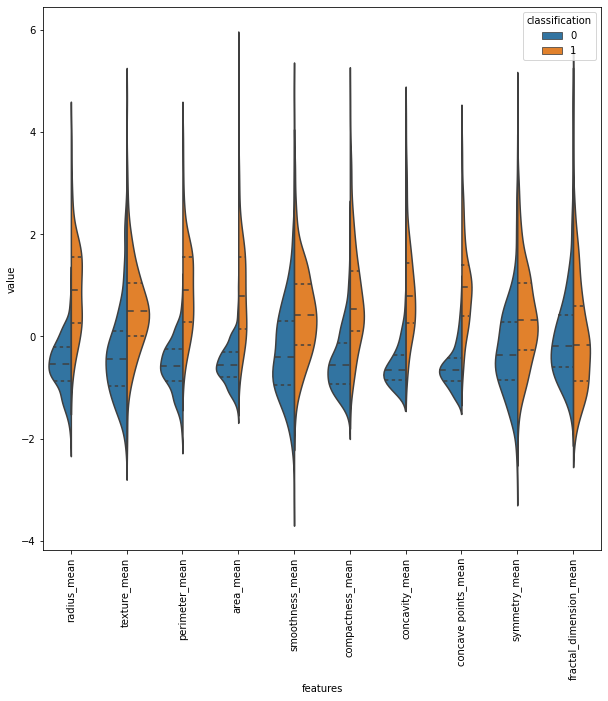

In [12]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

sns.violinplot(x="features",y="value",hue="classification",inner="quarts",split=True, data=first)

From the first 10 features, the following features seem to have a greater differentiation between malignant and benign masses:
* radius_mean
* perimeter_mean
* area_mean
* compactness_mean
* concavity_mean
* concave points_mean

A similarity between these features is that the lower quartile of malignant masses exceeds the upper quartile of benign masses.

<AxesSubplot:xlabel='features', ylabel='value'>

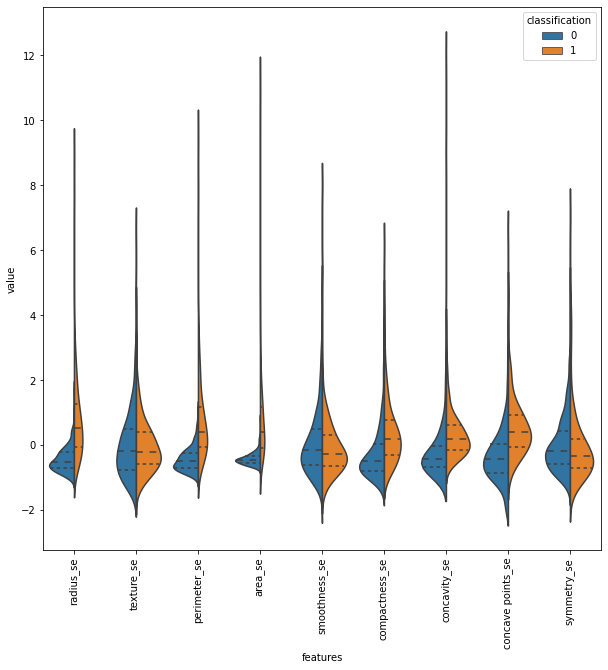

In [13]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90) # makes x-axis labels vertical

sns.violinplot(x="features",y="value",hue="classification",inner="quarts",split=True, data=second)

From the next 10 features, the following features seem to have a greater differentiation between malignant and benign masses:
* perimeter_se
* area_se

A similarity between these features is that the lower quartile of malignant masses exceeds the upper quartile of benign masses.

<AxesSubplot:xlabel='features', ylabel='value'>

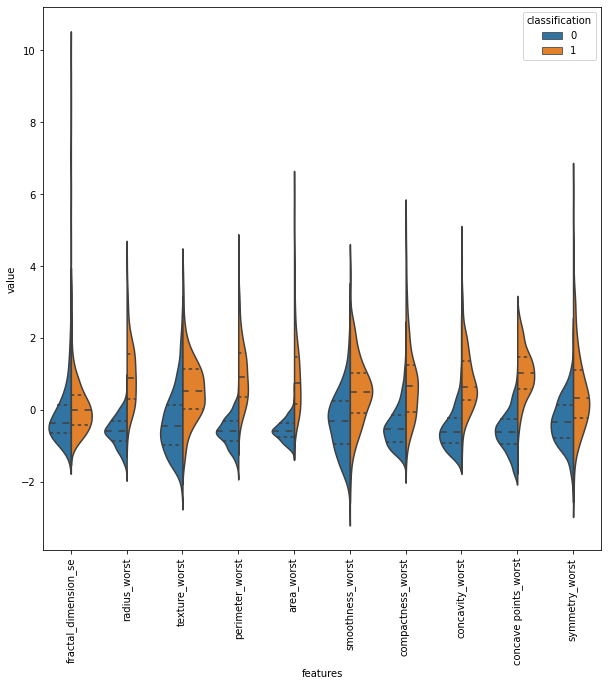

In [14]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

sns.violinplot(x="features",y="value",hue="classification",inner="quarts",split=True, data=third)

From the last 10 features, the following features seem to have a greater differentiation between malignant and benign masses:
* radius_worst
* perimeter_worst
* area_worst
* compactness_worst
* concavity_worst
* concave points_worst

A similarity between these features is that the lower quartile of malignant masses exceeds the upper quartile of benign masses.

#### Observations from Violin Plots
It seems that a malignant mass generally has greater radius, perimeter, area, compactness, concavity, and number of concave points as compared to a benign mass. Also, masses with greater perimeter and area standard error tend to be malignant as well.

### Box Plots

Box Plots accomplish similar visualisations to Violin Plots, plus they offer additional insight into outliers and how they are distributed. It also enables to see more clearly the difference between quartiles for malignant and benign masses.

<AxesSubplot:xlabel='features', ylabel='value'>

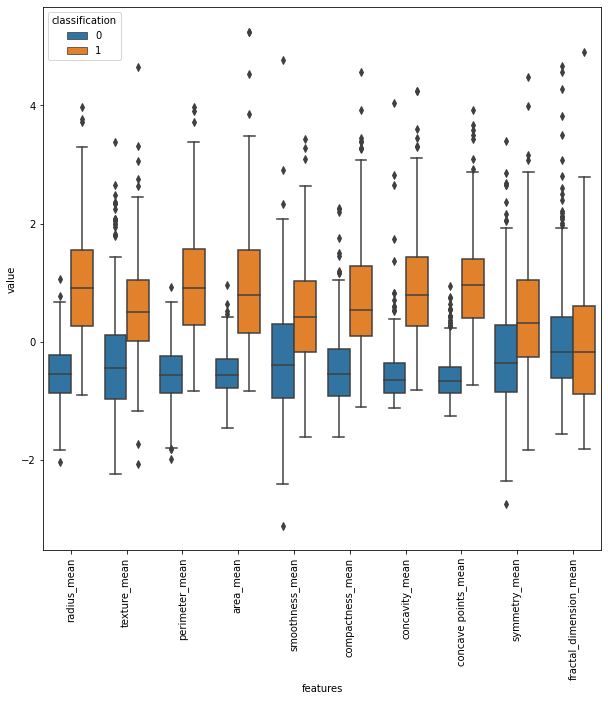

In [15]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

sns.boxplot(x="features", y="value", hue="classification", data=first)

<AxesSubplot:xlabel='features', ylabel='value'>

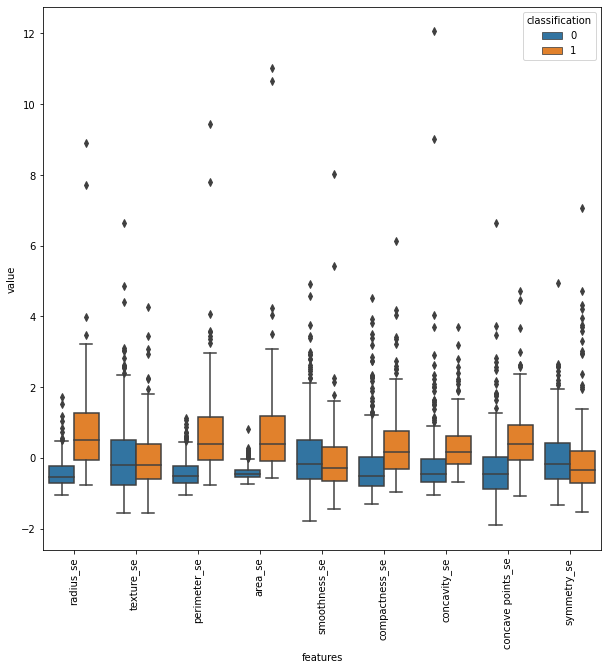

In [16]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

sns.boxplot(x="features", y="value", hue="classification", data=second)

<AxesSubplot:xlabel='features', ylabel='value'>

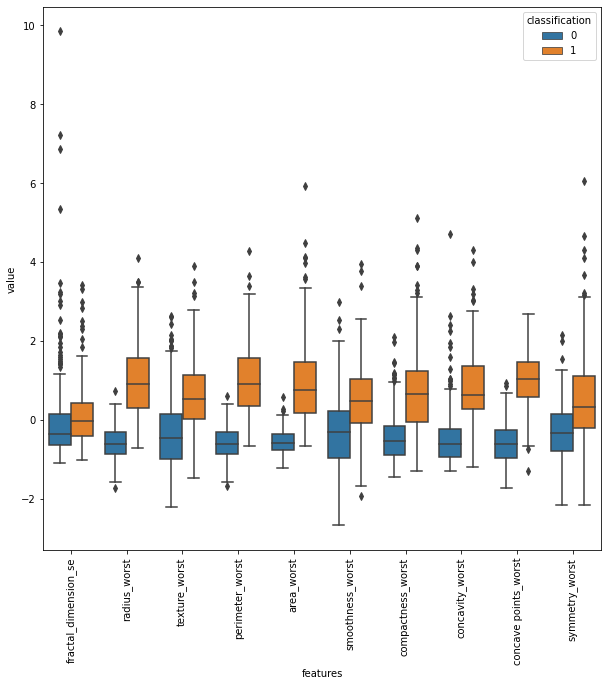

In [17]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

sns.boxplot(x="features", y="value", hue="classification", data=third)

#### Observations from Box Plots
Given the general trend that malignant masses have greater values for certain features as compared to benign masses, it could follow that features with a significant number of outliers in the opposite direction of the trend could be less useful in predicting whether a mass is malignant or benign.

One example would be the "concavity_mean" feature where there are a significant number of outliers for benign masses with values greater than the upper fence, even though it was previously noted that malignant masses generally have greater concavity than benign masses.

## Correlation Heatmap

Given that all the features are dealing with physical dimensions of the masses, could it be that certain features are correlated? For example, do greater perimeter measurements generally mean greater area measurements? An overall Correlation Heatmap will be useful in analysing the correlations between features.

We must also take note that some features are derived features, thus may be more correlated with its underlying features.

In [18]:
corr_df = df.drop(["classification","id"], axis=1)

corr_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
corr = corr_df.corr()

corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
compactness_worst,0.413463,0.277830,0.455774,0.390410,0.472468,0.865809,0.754968,0.667454,0.473200,0.458798,0.287103,-0.092439,0.341919,0.283257,-0.055558,0.678780,0.484858,0.452888,0.060255,0.390159,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455
concavity_worst,0.526911,0.301025,0.563879,0.512606,0.434926,0.816275,0.884103,0.752399,0.433721,0.346234,0.380585,-0.068956,0.418899,0.385100,-0.058298,0.639147,0.662564,0.549592,0.037119,0.379975,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511
concave points_worst,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,0.175325,0.531062,-0.119638,0.554897,0.538166,-0.102007,0.483208,0.440472,0.602450,-0.030413,0.215204,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
symmetry_worst,0.163953,0.105008,0.189115,0.143570,0.394309,0.510223,0.409464,0.375744,0.699826,0.334019,0.094543,-0.128215,0.109930,0.074126,-0.107342,0.277878,0.197788,0.143116,0.389402,0.111094,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848


<AxesSubplot:>

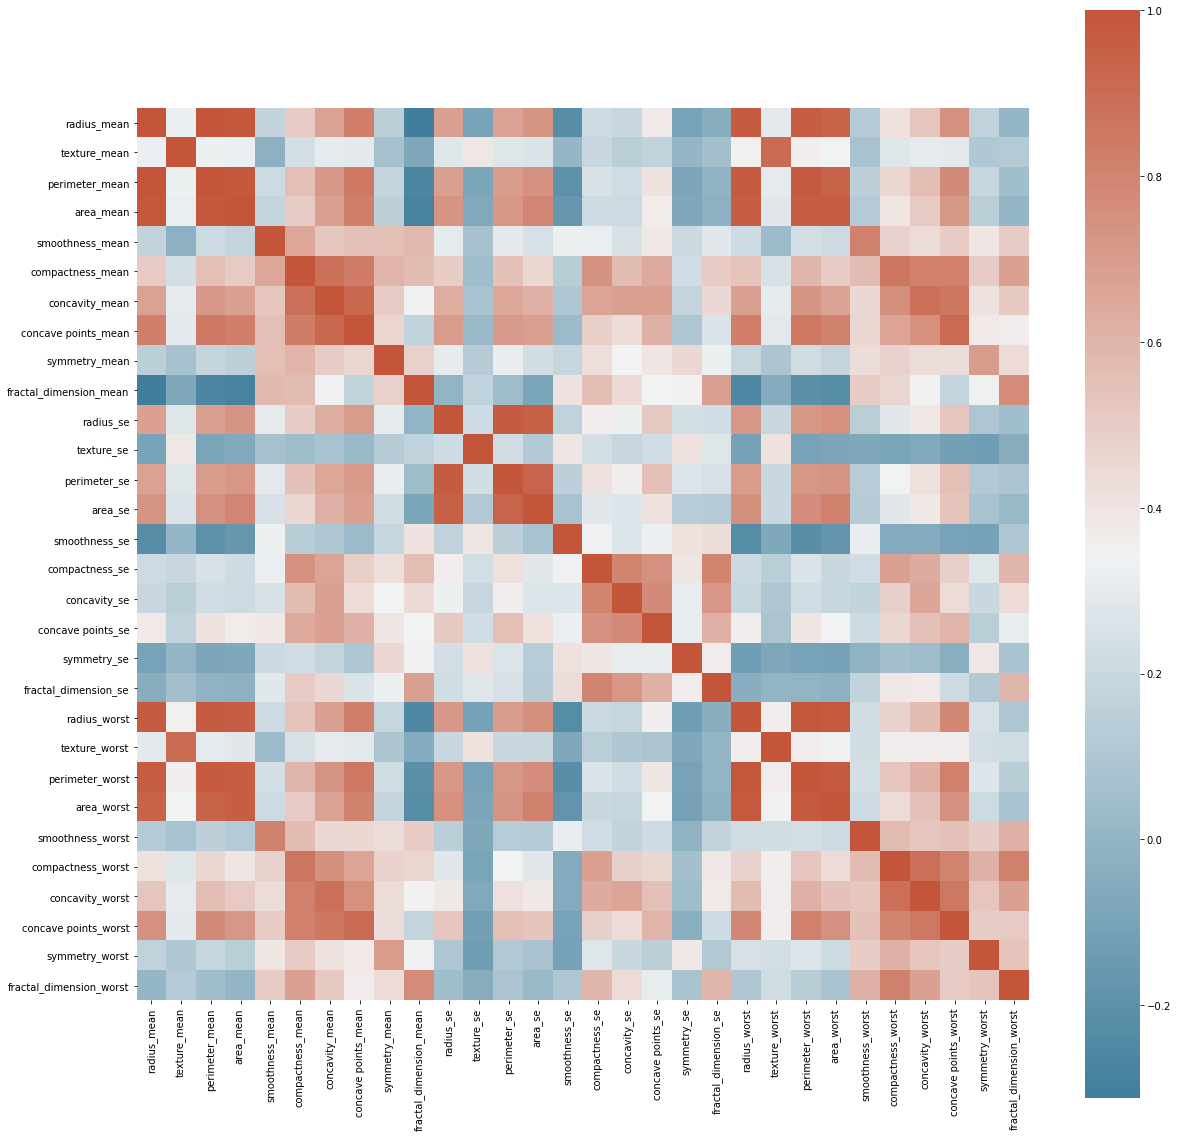

In [20]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(230, 20, as_cmap=True) # colour map from seaborn docs
sns.heatmap(corr, square = True, cbar=True, cmap=cmap)

We see the following "clusters" of correlation:
* radius, perimeter, area (very strong)
* radius, perimeter, area, compactness, concavity, concave points (strong)
* compactness, concavity, concave points, smoothness (decent)

However, it is a little hard to identify strongly correlated features. Perhaps there is a better way to visualise correlation.

## Correlation Heatmap (with Size)

Based on this TowardsDataScience article (https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec), correlation heatmaps are visually aesthetic but sometimes hard to derive insights from when there are many features. Thus, this article shows an implementation of correlation heatmaps that use varying sizes as well as colours to aid visual interpretation.

In [21]:
palette = sns.diverging_palette(20, 220, n=256) # create seaborn palette

def value_to_colour(val):
    val_position = float((val - (-1))) / (2) # position of value given min = -1 and max = 1
    ind = int(val_position * (255)) # target index in the color palette
    return palette[ind]

def improved_heatmap(x, y, size, values):
    fig, ax = plt.subplots(figsize=(20,20))
    
    x_labels = [feature for feature in x.unique()] # list of unique features for heatmap axes
    y_labels = [feature for feature in y.unique()]
    x_num = {enum[1]:enum[0] for enum in enumerate(x_labels)} # dictionary mapping feature : index
    y_num = {enum[1]:enum[0] for enum in enumerate(y_labels)}
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # setup a 1x15 grid
    
    # code for heatmap
    ax = plt.subplot(plot_grid[:,:-1])
    ax.scatter(
        x = x.map(x_num), # replaces every value in the pd series with another value (different from Python .map())
        y = y.map(y_num), # can use function, dict, or another pd series using this series as index
        s = size * 500,
        c = values.apply(value_to_colour),
        marker = 's'
    )
    
    ax.set_xticks([x_num[feature] for feature in x_labels]) # sets ticks at regular index intervals
    ax.set_xticklabels(x_labels, rotation=90, horizontalalignment='right')
    ax.set_yticks([y_num[feature] for feature in y_labels])
    ax.set_yticklabels(y_labels)
    ax.grid(False, 'major') # disables major gridlines
    ax.grid(True, 'minor') # enables minor gridlines (gridlines at mid way point)
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True) # shifts ticks to the right a bit
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # shifts ticks up a bit
    ax.set_xlim([-0.5, max([v for v in x_num.values()]) + 0.5]) # gets rid of weird padding
    ax.set_ylim([-0.5, max([v for v in y_num.values()]) + 0.5]) # same as above
    
    # code for colour bar
    ax = plt.subplot(plot_grid[:,-1])

    bar_y=np.linspace(-1, 1, 256) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette),
        left=0,
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xticks([]) # remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # show vertical ticks on the right
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [22]:
corr_copy = corr.copy()
corr_copy = pd.melt(corr_copy.reset_index(), id_vars="index")

corr_copy.columns = ['feature_1', 'feature_2', 'corr_value']

corr_copy

,feature_1,feature_2,corr_value
0,radius_mean,radius_mean,1.000000
1,texture_mean,radius_mean,0.323782
2,perimeter_mean,radius_mean,0.997855
3,area_mean,radius_mean,0.987357
4,smoothness_mean,radius_mean,0.170581
...,...,...,...
895,compactness_worst,fractal_dimension_worst,0.810455
896,concavity_worst,fractal_dimension_worst,0.686511
897,concave points_worst,fractal_dimension_worst,0.511114
898,symmetry_worst,fractal_dimension_worst,0.537848


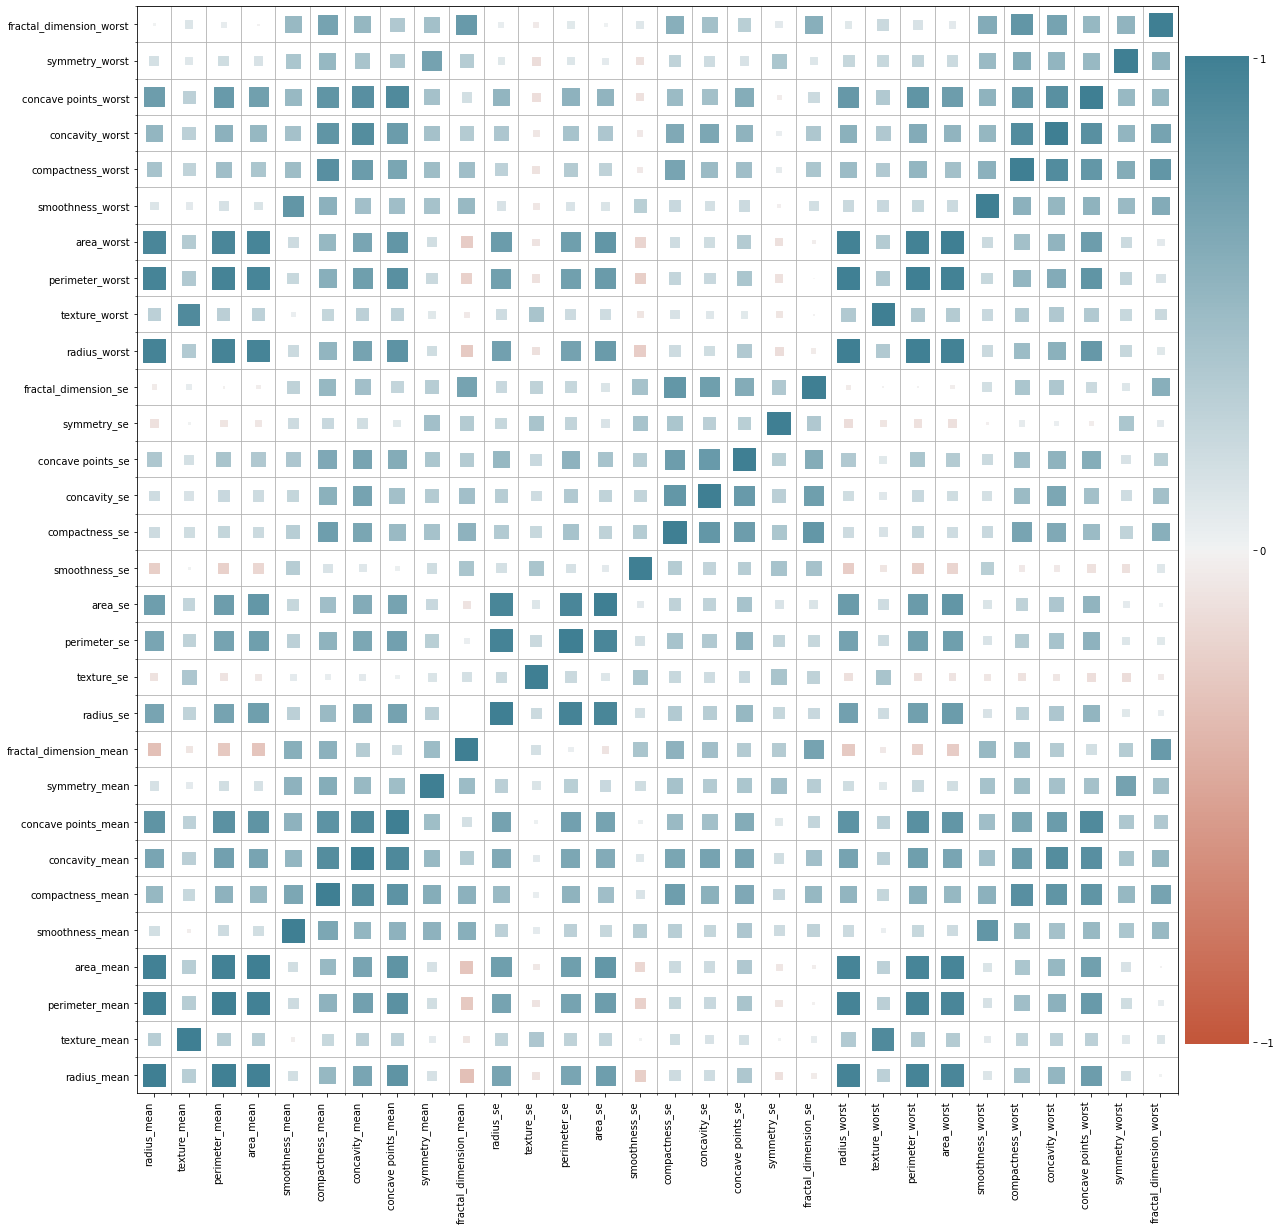

In [23]:
improved_heatmap(
    x = corr_copy['feature_1'],
    y = corr_copy['feature_2'],
    size = corr_copy['corr_value'].abs(),
    values = corr_copy['corr_value']
)

# Feature Selection

I was going to go straight into training ML models, but I realised that with so many features (30 in total), the ML model is likely going to pick up on a lot of noise. According to this TowardsDataScience article (https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2), overfitting, loss of explainability, and irrelevant features are some of the reasons why we may choose to do feature selection before modelling.

However, the next logical question would be, what is the optimal number of selected features, n? I can't seem to find a magic number or rule of thumb online, even though some forum posters suggest 10 data points per feature. I will research this portion on my own time. In the meantime, we will use our ML model accuracies as a benchmark for the number of features to select.

## Pearson's Correlation Filter

In this method of feature selection, we will be selecting the top n features with the highest Pearson's Correlation to the target (in this case, the "classification" column).

In [24]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1:]

In [25]:
def correlation_filter(x, y, n): # x are features, y is target, n is number of features to select
    corr_value_list = []
    feature_names = x.columns.to_list()
    for feature in feature_names:
        # uses Pearson's Correlation
        corr_value = np.corrcoef(x[feature], y.iloc[:,0])[0][1] # selects correlation value from matrix
        corr_value_list.append(corr_value)
    selection = x.iloc[:,np.argsort(np.abs(corr_value_list))[-n:]].columns.to_list() # selects top n features
    return selection

In [37]:
corr_features = correlation_filter(features, target, 10)

## Chi-Squared Filter

Another method of feature selection would be Chi-Squared. This is a new concept to me, but through this video (https://www.youtube.com/watch?v=ZjdBM7NO7bY) I learnt that Chi-Squared basically finds the deviation of the actual data from the expected value, which assumes that there is no relationship between the variables. The higher the Chi-Squared, the more deviation from the expected value, and thus the more likely that there is a relationship between the variables.

It is important to note that due to the nature of its calculation, Chi-Squared can only be used to analyse relationships between categorical variables. However, since the TowardsDataScience article linked above suggests that it can be used to analyse relationships between continuous and categorical variables, I am guessing that the sklearn libraries involved are able to arbitrarily "bucket" the continuous data into categories to determine the Chi-Squared.

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

def chi_squared_filter(x, y, n):
    x_normalised = MinMaxScaler().fit_transform(x)
    chi_selector = SelectKBest(chi2, k=n)
    chi_selector.fit(x_normalised, y)
    chi_support = chi_selector.get_support()
    chi_feature = x.loc[:,chi_support].columns.tolist()
    return chi_feature

In [38]:
chi_features = chi_squared_filter(features, target, 10)

# Machine Learning

## Data Splitting

First, we'll split the dataset into Training data (75%) and Test Data (25%). Seems to be the industry standard.

In [44]:
from sklearn.model_selection import train_test_split

x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(features, target, test_size = 0.25)
x_train_corr, x_test_corr, y_train_corr, y_test_corr = train_test_split(features[corr_features], target, test_size = 0.25)
x_train_chi, x_test_chi, y_train_chi, y_test_chi = train_test_split(features[chi_features], target, test_size = 0.25)

## Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

def tree_classifier(x_train, x_test, y_train, y_test):
    classifier = DecisionTreeClassifier(criterion="entropy", random_state=0) # i use entropy instead of gini here -> need to research what it means
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    return y_pred

### Using Full Feature Set

0.9440559440559441


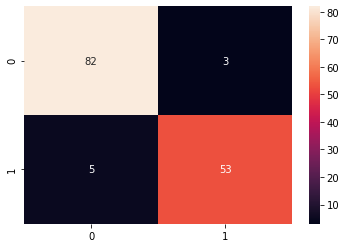

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

full_pred = tree_classifier(x_train_full, x_test_full, y_train_full)
sns.heatmap(confusion_matrix(y_test_full, full_pred), annot=True)
print(accuracy_score(y_test_full, full_pred))

### Using Pearson's Correlation Filtered Feature Set

0.958041958041958


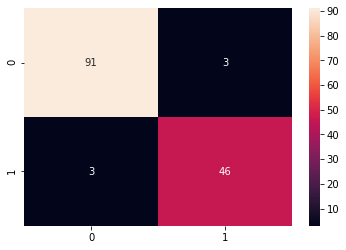

In [51]:
corr_pred = tree_classifier(x_train_corr, x_test_corr, y_train_corr)
sns.heatmap(confusion_matrix(y_test_corr, corr_pred), annot=True)
print(accuracy_score(y_test_corr, corr_pred))

### Using Chi-Squared Filtered Feature Set

0.951048951048951


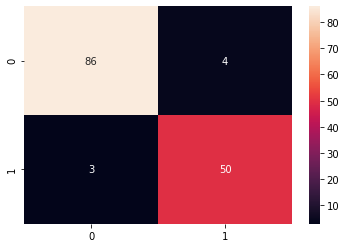

In [52]:
chi_pred = tree_classifier(x_train_chi, x_test_chi, y_train_chi)
sns.heatmap(confusion_matrix(y_test_chi, chi_pred), annot=True)
print(accuracy_score(y_test_chi, chi_pred))

Wow looks like the filtered datasets performed the best, with the Pearson's Correlation Filtered one performing the best with 95.8% accuracy, followed by Chi-Squared with 95.1% accuracy. The original dataset is not too shabby either at 94.4% accuracy, but given the nature of this project, a little more accuracy can be a gamechanger for breast cancer patients and healthcare providers.